In [74]:
from ivis import Ivis
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

from keras.layers import BatchNormalization, Dense, Activation, Lambdabda
from keras.models import Sequential
from keras.callbacks import LearningRateScheduler
from keras import backend as K

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
base_path = '../data/e-dom/data/defect'

In [3]:
data_fname = 'ant.csv'

In [4]:
df = pd.read_csv(f'{base_path}/{data_fname}')

In [16]:
df.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,120,1,0,365,288,6692,352,30,103,0.975471,...,0.594595,5,0.000000,0.090084,0,0,18.558333,6,1.4167,1
1,49,4,1,31,210,844,1,30,28,0.877404,...,1.000000,2,0.624000,0.127315,0,0,58.408163,13,1.4490,1
2,26,4,0,12,109,233,1,12,20,0.892000,...,1.000000,1,0.709302,0.157051,2,2,32.115385,4,1.0769,1
3,17,1,0,13,73,82,8,6,10,0.820312,...,1.000000,0,0.000000,0.183824,0,0,33.705882,3,0.9412,1
4,56,2,2,51,169,1200,37,16,35,0.848864,...,0.875000,2,0.409639,0.155844,1,5,31.607143,14,2.1964,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 21 columns):
wmc       745 non-null int64
dit       745 non-null int64
noc       745 non-null int64
cbo       745 non-null int64
rfc       745 non-null int64
lcom      745 non-null int64
ca        745 non-null int64
ce        745 non-null int64
npm       745 non-null int64
lcom3     745 non-null float64
loc       745 non-null int64
dam       745 non-null float64
moa       745 non-null int64
mfa       745 non-null float64
cam       745 non-null float64
ic        745 non-null int64
cbm       745 non-null int64
amc       745 non-null float64
max_cc    745 non-null int64
avg_cc    745 non-null float64
bug       745 non-null int64
dtypes: float64(6), int64(15)
memory usage: 122.3 KB


In [5]:
x = df.drop('bug', axis=1)
y = df['bug']

In [20]:
x.shape

(745, 20)

# Baseline deep learner

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [39]:
model = Sequential([
    Dense(3, input_shape=(20,)),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(20),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(20),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(1),
    BatchNormalization(),
    Activation('sigmoid')
])

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
558/558 [==============================] - 8s 14ms/step - loss: 0.6037 - acc: 0.7330
Epoch 2/100
558/558 [==============================] - 0s 312us/step - loss: 0.5934 - acc: 0.7867
Epoch 3/100
558/558 [==============================] - 0s 300us/step - loss: 0.5751 - acc: 0.7832
Epoch 4/100
558/558 [==============================] - 0s 379us/step - loss: 0.5687 - acc: 0.7921
Epoch 5/100
558/558 [==============================] - 0s 321us/step - loss: 0.5706 - acc: 0.8082
Epoch 6/100
558/558 [==============================] - 0s 361us/step - loss: 0.5664 - acc: 0.7867
Epoch 7/100
558/558 [==============================] - 0s 366us/step - loss: 0.5477 - acc: 0.7957
Epoch 8/100
558/558 [==============================] - 0s 316us/step - loss: 0.5555 - acc: 0.7939
Epoch 9/100
558/558 [==============================] - 0s 349us/step - loss: 0.5588 - acc: 0.7778
Epoch 10/100
558/558 [==============================] - 0s 366us/step - loss: 0.5428 - acc: 0.7921
Epoch 11/100
558/558

558/558 [==============================] - 0s 346us/step - loss: 0.3963 - acc: 0.8369
Epoch 84/100
558/558 [==============================] - 0s 370us/step - loss: 0.3972 - acc: 0.8244
Epoch 85/100
558/558 [==============================] - 0s 321us/step - loss: 0.3995 - acc: 0.8405
Epoch 86/100
558/558 [==============================] - 0s 335us/step - loss: 0.4043 - acc: 0.8262
Epoch 87/100
558/558 [==============================] - 0s 306us/step - loss: 0.3973 - acc: 0.8351
Epoch 88/100
558/558 [==============================] - 0s 304us/step - loss: 0.4068 - acc: 0.8280
Epoch 89/100
558/558 [==============================] - 0s 336us/step - loss: 0.3990 - acc: 0.8315
Epoch 90/100
558/558 [==============================] - 0s 335us/step - loss: 0.4013 - acc: 0.8369
Epoch 91/100
558/558 [==============================] - 0s 351us/step - loss: 0.3961 - acc: 0.8351
Epoch 92/100
558/558 [==============================] - 0s 347us/step - loss: 0.3959 - acc: 0.8369
Epoch 93/100
558/558 [=

In [41]:
print(classification_report(y_test, model.predict_classes(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       140
           1       0.74      0.49      0.59        47

    accuracy                           0.83       187
   macro avg       0.79      0.72      0.74       187
weighted avg       0.82      0.83      0.82       187



In [42]:
x_res, y_res = RandomOverSampler().fit_resample(x_train, y_train)
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_res, y_res, epochs=100)

Epoch 1/100
878/878 [==============================] - 7s 8ms/step - loss: 0.6489 - acc: 0.6720
Epoch 2/100
878/878 [==============================] - 0s 313us/step - loss: 0.6241 - acc: 0.6788
Epoch 3/100
878/878 [==============================] - 0s 315us/step - loss: 0.6200 - acc: 0.6879
Epoch 4/100
878/878 [==============================] - 0s 314us/step - loss: 0.6034 - acc: 0.6925
Epoch 5/100
878/878 [==============================] - 0s 315us/step - loss: 0.6010 - acc: 0.7027
Epoch 6/100
878/878 [==============================] - 0s 314us/step - loss: 0.5896 - acc: 0.7118
Epoch 7/100
878/878 [==============================] - 0s 307us/step - loss: 0.5875 - acc: 0.7335
Epoch 8/100
878/878 [==============================] - 0s 307us/step - loss: 0.5868 - acc: 0.7221
Epoch 9/100
878/878 [==============================] - 0s 377us/step - loss: 0.5834 - acc: 0.7164
Epoch 10/100
878/878 [==============================] - 0s 309us/step - loss: 0.5713 - acc: 0.7358
Epoch 11/100
878/878 

878/878 [==============================] - 0s 338us/step - loss: 0.4392 - acc: 0.8064
Epoch 84/100
878/878 [==============================] - 0s 325us/step - loss: 0.4403 - acc: 0.7984
Epoch 85/100
878/878 [==============================] - 0s 303us/step - loss: 0.4343 - acc: 0.8189
Epoch 86/100
878/878 [==============================] - 0s 314us/step - loss: 0.4586 - acc: 0.7916
Epoch 87/100
878/878 [==============================] - 0s 306us/step - loss: 0.4429 - acc: 0.8098
Epoch 88/100
878/878 [==============================] - 0s 324us/step - loss: 0.4447 - acc: 0.7904
Epoch 89/100
878/878 [==============================] - 0s 295us/step - loss: 0.4507 - acc: 0.7973
Epoch 90/100
878/878 [==============================] - 0s 317us/step - loss: 0.4377 - acc: 0.7973
Epoch 91/100
878/878 [==============================] - 0s 301us/step - loss: 0.4381 - acc: 0.8075
Epoch 92/100
878/878 [==============================] - 0s 304us/step - loss: 0.4290 - acc: 0.7995
Epoch 93/100
878/878 [=

In [43]:
print(classification_report(y_test, model.predict_classes(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       140
           1       0.56      0.68      0.62        47

    accuracy                           0.79       187
   macro avg       0.72      0.75      0.73       187
weighted avg       0.80      0.79      0.79       187



# Dimensionality reduction

In [26]:
ivis = Ivis(embedding_dims=2, k=7)
x_red = ivis.fit_transform(np.array(x), np.array(y))

100%|██████████| 745/745 [00:00<00:00, 55618.46it/s]

Building KNN index
Extracting KNN from index



100%|██████████| 745/745 [00:00<00:00, 5431.76it/s]


Training neural network
Epoch 1/1000
5/5 [==============================] - 5s 1s/step - loss: 20.7020 - stacked_triplets_loss: 12.2239 - supervised_loss: 29.0315
Epoch 2/1000
5/5 [==============================] - 0s 55ms/step - loss: 10.1295 - stacked_triplets_loss: 8.7866 - supervised_loss: 11.3737
Epoch 3/1000
5/5 [==============================] - 0s 55ms/step - loss: 64.5300 - stacked_triplets_loss: 20.2468 - supervised_loss: 108.8132
Epoch 4/1000
5/5 [==============================] - 0s 55ms/step - loss: 6.7783 - stacked_triplets_loss: 9.1699 - supervised_loss: 4.3264
Epoch 5/1000
5/5 [==============================] - 0s 50ms/step - loss: 15.3156 - stacked_triplets_loss: 9.2292 - supervised_loss: 21.4909
Epoch 6/1000
5/5 [==============================] - 0s 28ms/step - loss: 9.6597 - stacked_triplets_loss: 9.6022 - supervised_loss: 9.7128
Epoch 7/1000
5/5 [==============================] - 0s 48ms/step - loss: 3.3337 - stacked_triplets_loss: 4.0748 - supervised_loss: 2.5875
E

5/5 [==============================] - 0s 58ms/step - loss: 0.7521 - stacked_triplets_loss: 0.8706 - supervised_loss: 0.6317
Epoch 118/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.4407 - stacked_triplets_loss: 0.5969 - supervised_loss: 0.2845
Epoch 119/1000
5/5 [==============================] - 0s 56ms/step - loss: 0.8807 - stacked_triplets_loss: 0.8116 - supervised_loss: 0.9431
Epoch 120/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.6495 - stacked_triplets_loss: 0.6145 - supervised_loss: 0.6797
Epoch 121/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.5528 - stacked_triplets_loss: 0.6398 - supervised_loss: 0.4687
Epoch 122/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.7062 - stacked_triplets_loss: 0.6980 - supervised_loss: 0.7121
Epoch 123/1000
5/5 [==============================] - 0s 56ms/step - loss: 1.0206 - stacked_triplets_loss: 0.9920 - supervised_loss: 1.0491
Epoch 124/1000
5/5 [===============

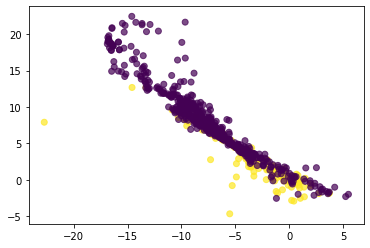

In [28]:
plt.scatter(x_red.T[0], x_red.T[1], c=y, alpha=0.7)

In [46]:
ivis = Ivis(embedding_dims=2, k=5)
x_red = ivis.fit_transform(np.array(x), np.array(y))

100%|██████████| 745/745 [00:00<00:00, 51377.12it/s]

Building KNN index
Extracting KNN from index



100%|██████████| 745/745 [00:00<00:00, 5381.22it/s]


Training neural network
Epoch 1/1000
5/5 [==============================] - 7s 1s/step - loss: 21.3575 - stacked_triplets_loss: 19.8294 - supervised_loss: 22.8883
Epoch 2/1000
5/5 [==============================] - 0s 39ms/step - loss: 8.1250 - stacked_triplets_loss: 7.5653 - supervised_loss: 8.6497
Epoch 3/1000
5/5 [==============================] - 0s 58ms/step - loss: 15.0282 - stacked_triplets_loss: 14.8883 - supervised_loss: 15.1681
Epoch 4/1000
5/5 [==============================] - 0s 53ms/step - loss: 5.4009 - stacked_triplets_loss: 6.7056 - supervised_loss: 4.0958
Epoch 5/1000
5/5 [==============================] - 0s 52ms/step - loss: 8.1176 - stacked_triplets_loss: 12.2786 - supervised_loss: 3.9565
Epoch 6/1000
5/5 [==============================] - 0s 28ms/step - loss: 3.8819 - stacked_triplets_loss: 4.3724 - supervised_loss: 3.3905
Epoch 7/1000
5/5 [==============================] - 0s 49ms/step - loss: 6.6599 - stacked_triplets_loss: 6.6430 - supervised_loss: 6.6125
Epoch

5/5 [==============================] - 0s 56ms/step - loss: 0.4607 - stacked_triplets_loss: 0.5029 - supervised_loss: 0.4184
Epoch 118/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.7245 - stacked_triplets_loss: 0.6179 - supervised_loss: 0.8255
Epoch 119/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.6170 - stacked_triplets_loss: 0.6223 - supervised_loss: 0.6098
Epoch 120/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.6144 - stacked_triplets_loss: 0.7040 - supervised_loss: 0.5249
Epoch 121/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.5386 - stacked_triplets_loss: 0.5028 - supervised_loss: 0.5713
Epoch 122/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.5761 - stacked_triplets_loss: 0.6062 - supervised_loss: 0.5461
Epoch 123/1000
5/5 [==============================] - 0s 57ms/step - loss: 0.4446 - stacked_triplets_loss: 0.4264 - supervised_loss: 0.4610
Epoch 124/1000
5/5 [===============

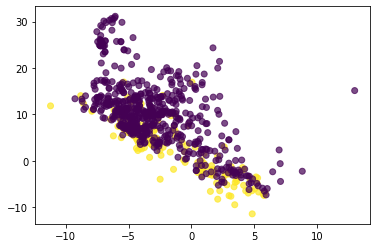

In [47]:
plt.scatter(x_red.T[0], x_red.T[1], c=y, alpha=0.7)

## How well do we do (k=6)?

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_red, y)

svm = SVC()
svm.fit(x_train, y_train)
print(classification_report(y_test, svm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       148
           1       0.56      0.38      0.45        39

    accuracy                           0.81       187
   macro avg       0.70      0.65      0.67       187
weighted avg       0.79      0.81      0.79       187



/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [45]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       148
           1       0.61      0.51      0.56        39

    accuracy                           0.83       187
   macro avg       0.74      0.71      0.72       187
weighted avg       0.82      0.83      0.82       187



## How well do we do (k=5)?

In [48]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       148
           1       0.61      0.51      0.56        39

    accuracy                           0.83       187
   macro avg       0.74      0.71      0.72       187
weighted avg       0.82      0.83      0.82       187



In [61]:
model = Sequential([
    Dense(2, input_shape=(2,)),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(2),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(1),
    BatchNormalization(),
    Activation('sigmoid')
])

In [63]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
558/558 [==============================] - 5s 10ms/step - loss: 0.6051 - acc: 0.7616
Epoch 2/100
558/558 [==============================] - 0s 243us/step - loss: 0.5973 - acc: 0.7670
Epoch 3/100
558/558 [==============================] - 0s 250us/step - loss: 0.5952 - acc: 0.7563
Epoch 4/100
558/558 [==============================] - 0s 245us/step - loss: 0.5836 - acc: 0.7652
Epoch 5/100
558/558 [==============================] - 0s 254us/step - loss: 0.5822 - acc: 0.7616
Epoch 6/100
558/558 [==============================] - 0s 253us/step - loss: 0.5822 - acc: 0.7652
Epoch 7/100
558/558 [==============================] - 0s 240us/step - loss: 0.5814 - acc: 0.7563
Epoch 8/100
558/558 [==============================] - 0s 239us/step - loss: 0.5660 - acc: 0.7688
Epoch 9/100
558/558 [==============================] - 0s 254us/step - loss: 0.5733 - acc: 0.7760
Epoch 10/100
558/558 [==============================] - 0s 241us/step - loss: 0.5647 - acc: 0.7760
Epoch 11/100
558/558

In [64]:
print(classification_report(y_test, model.predict_classes(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       148
           1       0.68      0.44      0.53        39

    accuracy                           0.84       187
   macro avg       0.77      0.69      0.72       187
weighted avg       0.83      0.84      0.83       187



In [66]:
f1_score(y_test, model.predict_classes(x_test))

0.53125

Note: k=3-7 were tested. These were the best two results.

# Do 3 dimensions work better?

## k=4

In [76]:
ivis = Ivis(embedding_dims=3, k=3)
x_red = ivis.fit_transform(np.array(x), np.array(y))

100%|██████████| 745/745 [00:00<00:00, 47064.55it/s]

Building KNN index
Extracting KNN from index



100%|██████████| 745/745 [00:00<00:00, 5218.02it/s]


Training neural network
Epoch 1/1000
5/5 [==============================] - 9s 2s/step - loss: 37.4848 - stacked_triplets_loss: 13.5910 - supervised_loss: 61.3787
Epoch 2/1000
5/5 [==============================] - 0s 55ms/step - loss: 14.0743 - stacked_triplets_loss: 11.4449 - supervised_loss: 16.5022
Epoch 3/1000
5/5 [==============================] - 0s 50ms/step - loss: 16.7139 - stacked_triplets_loss: 6.6228 - supervised_loss: 26.8049
Epoch 4/1000
5/5 [==============================] - 0s 53ms/step - loss: 12.7616 - stacked_triplets_loss: 13.0407 - supervised_loss: 12.5390
Epoch 5/1000
5/5 [==============================] - 0s 49ms/step - loss: 10.6779 - stacked_triplets_loss: 10.6089 - supervised_loss: 10.7214
Epoch 6/1000
5/5 [==============================] - 0s 26ms/step - loss: 3.8756 - stacked_triplets_loss: 4.9767 - supervised_loss: 2.7854
Epoch 7/1000
5/5 [==============================] - 0s 51ms/step - loss: 3.2559 - stacked_triplets_loss: 4.3049 - supervised_loss: 2.197

5/5 [==============================] - 0s 50ms/step - loss: 0.6933 - stacked_triplets_loss: 0.6850 - supervised_loss: 0.7001
Epoch 118/1000
5/5 [==============================] - 0s 57ms/step - loss: 0.5617 - stacked_triplets_loss: 0.4932 - supervised_loss: 0.6301
Epoch 119/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.4139 - stacked_triplets_loss: 0.4391 - supervised_loss: 0.3886
Epoch 120/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.7379 - stacked_triplets_loss: 0.5875 - supervised_loss: 0.8861
Epoch 121/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.5604 - stacked_triplets_loss: 0.4572 - supervised_loss: 0.6631
Epoch 122/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.6649 - stacked_triplets_loss: 0.7039 - supervised_loss: 0.6259
Epoch 123/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.7674 - stacked_triplets_loss: 0.7732 - supervised_loss: 0.7565
Epoch 124/1000
5/5 [===============

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x_red, y)

In [78]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       149
           1       0.47      0.42      0.44        38

    accuracy                           0.79       187
   macro avg       0.66      0.65      0.66       187
weighted avg       0.78      0.79      0.78       187



In [79]:
model = Sequential([
    Dense(3, input_shape=(3,)),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(3),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(1),
    BatchNormalization(),
    Activation('sigmoid')
])

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)
print(classification_report(y_test, model.predict_classes(x_test)))

Epoch 1/100
558/558 [==============================] - 8s 13ms/step - loss: 0.6932 - acc: 0.4875
Epoch 2/100
558/558 [==============================] - 0s 261us/step - loss: 0.6650 - acc: 0.5269
Epoch 3/100
558/558 [==============================] - 0s 247us/step - loss: 0.6440 - acc: 0.5323
Epoch 4/100
558/558 [==============================] - 0s 252us/step - loss: 0.6366 - acc: 0.5323
Epoch 5/100
558/558 [==============================] - 0s 244us/step - loss: 0.6206 - acc: 0.5520
Epoch 6/100
558/558 [==============================] - 0s 264us/step - loss: 0.6083 - acc: 0.5591
Epoch 7/100
558/558 [==============================] - 0s 262us/step - loss: 0.6051 - acc: 0.6290
Epoch 8/100
558/558 [==============================] - 0s 325us/step - loss: 0.5942 - acc: 0.6756
Epoch 9/100
558/558 [==============================] - 0s 339us/step - loss: 0.5833 - acc: 0.6720
Epoch 10/100
558/558 [==============================] - 0s 268us/step - loss: 0.5848 - acc: 0.6918
Epoch 11/100
558/558

## k=4

In [8]:
ivis = Ivis(embedding_dims=3, k=4)
x_red = ivis.fit_transform(np.array(x), np.array(y))

x_train, x_test, y_train, y_test = train_test_split(x_red, y)
model = AdaBoostClassifier()
model.fit(x_train, y_train)

100%|██████████| 745/745 [00:00<00:00, 37385.52it/s]

Building KNN index
Extracting KNN from index



100%|██████████| 745/745 [00:00<00:00, 3978.39it/s]
W1025 22:05:40.352408 139779904788096 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4075: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1025 22:05:40.812964 139779904788096 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Training neural network
Epoch 1/1000
5/5 [==============================] - 10s 2s/step - loss: 13.6346 - stacked_triplets_loss: 12.6352 - supervised_loss: 14.6340
Epoch 2/1000
5/5 [==============================] - 0s 76ms/step - loss: 10.8724 - stacked_triplets_loss: 10.3863 - supervised_loss: 11.3934
Epoch 3/1000
5/5 [==============================] - 0s 82ms/step - loss: 12.2327 - stacked_triplets_loss: 16.6476 - supervised_loss: 7.8178
Epoch 4/1000
5/5 [==============================] - 0s 66ms/step - loss: 4.7268 - stacked_triplets_loss: 4.9716 - supervised_loss: 4.5213
Epoch 5/1000
5/5 [==============================] - 0s 64ms/step - loss: 8.6785 - stacked_triplets_loss: 11.0166 - supervised_loss: 6.2859
Epoch 6/1000
5/5 [==============================] - 0s 52ms/step - loss: 5.9996 - stacked_triplets_loss: 6.7081 - supervised_loss: 5.2917
Epoch 7/1000
5/5 [==============================] - 0s 71ms/step - loss: 4.2127 - stacked_triplets_loss: 5.4876 - supervised_loss: 2.9670
Ep

5/5 [==============================] - 0s 54ms/step - loss: 1.2024 - stacked_triplets_loss: 1.5958 - supervised_loss: 0.8090
Epoch 60/1000
5/5 [==============================] - 0s 32ms/step - loss: 1.2919 - stacked_triplets_loss: 1.5387 - supervised_loss: 1.0360
Epoch 61/1000
5/5 [==============================] - 0s 50ms/step - loss: 1.0357 - stacked_triplets_loss: 1.1557 - supervised_loss: 0.9129
Epoch 62/1000
5/5 [==============================] - 0s 46ms/step - loss: 0.5200 - stacked_triplets_loss: 0.6299 - supervised_loss: 0.4129
Epoch 63/1000
5/5 [==============================] - 0s 53ms/step - loss: 1.4116 - stacked_triplets_loss: 1.7952 - supervised_loss: 1.0316
Epoch 64/1000
5/5 [==============================] - 0s 57ms/step - loss: 1.0660 - stacked_triplets_loss: 1.2730 - supervised_loss: 0.8590
Epoch 65/1000
5/5 [==============================] - 0s 53ms/step - loss: 1.0391 - stacked_triplets_loss: 1.2725 - supervised_loss: 0.8115
Epoch 66/1000
5/5 [======================

5/5 [==============================] - 0s 56ms/step - loss: 0.5991 - stacked_triplets_loss: 0.5820 - supervised_loss: 0.6147
Epoch 118/1000
5/5 [==============================] - 0s 56ms/step - loss: 0.4683 - stacked_triplets_loss: 0.4199 - supervised_loss: 0.5181
Epoch 119/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.5993 - stacked_triplets_loss: 0.4706 - supervised_loss: 0.7280
Epoch 120/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.6267 - stacked_triplets_loss: 0.7338 - supervised_loss: 0.5267
Epoch 121/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.5459 - stacked_triplets_loss: 0.5185 - supervised_loss: 0.5733
Epoch 122/1000
5/5 [==============================] - 0s 46ms/step - loss: 0.6124 - stacked_triplets_loss: 0.5514 - supervised_loss: 0.6731
Epoch 123/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.5649 - stacked_triplets_loss: 0.5550 - supervised_loss: 0.5747
Epoch 124/1000
5/5 [===============

5/5 [==============================] - 0s 53ms/step - loss: 0.2865 - stacked_triplets_loss: 0.2849 - supervised_loss: 0.2870
Epoch 176/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.4827 - stacked_triplets_loss: 0.3934 - supervised_loss: 0.5707
Epoch 177/1000
5/5 [==============================] - 0s 56ms/step - loss: 0.4240 - stacked_triplets_loss: 0.3411 - supervised_loss: 0.5068
Epoch 178/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.5513 - stacked_triplets_loss: 0.5122 - supervised_loss: 0.5882
Epoch 179/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.3343 - stacked_triplets_loss: 0.2069 - supervised_loss: 0.4602
Epoch 180/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.3748 - stacked_triplets_loss: 0.2804 - supervised_loss: 0.4692
Epoch 181/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.4920 - stacked_triplets_loss: 0.4283 - supervised_loss: 0.5533
Epoch 182/1000
5/5 [===============

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [9]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       144
           1       0.51      0.47      0.49        43

    accuracy                           0.78       187
   macro avg       0.68      0.67      0.67       187
weighted avg       0.77      0.78      0.77       187



In [11]:
model = Sequential([
    Dense(3, input_shape=(3,)),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(3),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(3),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(1),
    BatchNormalization(),
    Activation('sigmoid')
])

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)
print(classification_report(y_test, model.predict_classes(x_test)))

Epoch 1/100
558/558 [==============================] - 5s 9ms/step - loss: 0.8437 - acc: 0.4659
Epoch 2/100
558/558 [==============================] - 0s 389us/step - loss: 0.7925 - acc: 0.4875
Epoch 3/100
558/558 [==============================] - 0s 306us/step - loss: 0.7612 - acc: 0.4875
Epoch 4/100
558/558 [==============================] - 0s 328us/step - loss: 0.7296 - acc: 0.5125
Epoch 5/100
558/558 [==============================] - 0s 310us/step - loss: 0.7201 - acc: 0.5215
Epoch 6/100
558/558 [==============================] - 0s 385us/step - loss: 0.6981 - acc: 0.5215
Epoch 7/100
558/558 [==============================] - 0s 298us/step - loss: 0.6716 - acc: 0.5358
Epoch 8/100
558/558 [==============================] - 0s 308us/step - loss: 0.6649 - acc: 0.5448
Epoch 9/100
558/558 [==============================] - 0s 310us/step - loss: 0.6458 - acc: 0.5645
Epoch 10/100
558/558 [==============================] - 0s 299us/step - loss: 0.6419 - acc: 0.5806
Epoch 11/100
558/558 

558/558 [==============================] - 0s 288us/step - loss: 0.4591 - acc: 0.7832
Epoch 84/100
558/558 [==============================] - 0s 280us/step - loss: 0.4565 - acc: 0.7885
Epoch 85/100
558/558 [==============================] - 0s 258us/step - loss: 0.4588 - acc: 0.7832
Epoch 86/100
558/558 [==============================] - 0s 245us/step - loss: 0.4550 - acc: 0.7832
Epoch 87/100
558/558 [==============================] - 0s 246us/step - loss: 0.4475 - acc: 0.7778
Epoch 88/100
558/558 [==============================] - 0s 263us/step - loss: 0.4586 - acc: 0.7921
Epoch 89/100
558/558 [==============================] - 0s 250us/step - loss: 0.4654 - acc: 0.7724
Epoch 90/100
558/558 [==============================] - 0s 245us/step - loss: 0.4518 - acc: 0.8047
Epoch 91/100
558/558 [==============================] - 0s 248us/step - loss: 0.4555 - acc: 0.8011
Epoch 92/100
558/558 [==============================] - 0s 251us/step - loss: 0.4564 - acc: 0.7867
Epoch 93/100
558/558 [=

### Oversampling trick?

In [13]:
smote = SMOTE()

In [14]:
x_res, y_res = smote.fit_resample(x_train, y_train)

In [15]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_res, y_res, epochs=100)
print(classification_report(y_test, model.predict_classes(x_test)))

Epoch 1/100
870/870 [==============================] - 4s 5ms/step - loss: 0.6844 - acc: 0.5621
Epoch 2/100
870/870 [==============================] - 0s 319us/step - loss: 0.6648 - acc: 0.5805
Epoch 3/100
870/870 [==============================] - 0s 291us/step - loss: 0.6538 - acc: 0.6000
Epoch 4/100
870/870 [==============================] - 0s 289us/step - loss: 0.6503 - acc: 0.6379
Epoch 5/100
870/870 [==============================] - 0s 300us/step - loss: 0.6440 - acc: 0.6218
Epoch 6/100
870/870 [==============================] - 0s 318us/step - loss: 0.6359 - acc: 0.6770
Epoch 7/100
870/870 [==============================] - 0s 276us/step - loss: 0.6294 - acc: 0.6793
Epoch 8/100
870/870 [==============================] - 0s 299us/step - loss: 0.6200 - acc: 0.7023
Epoch 9/100
870/870 [==============================] - 0s 308us/step - loss: 0.6163 - acc: 0.7069
Epoch 10/100
870/870 [==============================] - 0s 301us/step - loss: 0.6108 - acc: 0.7149
Epoch 11/100
870/870 

870/870 [==============================] - 0s 354us/step - loss: 0.5027 - acc: 0.7575
Epoch 84/100
870/870 [==============================] - 0s 341us/step - loss: 0.4963 - acc: 0.7586
Epoch 85/100
870/870 [==============================] - 0s 323us/step - loss: 0.4901 - acc: 0.7621
Epoch 86/100
870/870 [==============================] - 0s 354us/step - loss: 0.5023 - acc: 0.7494
Epoch 87/100
870/870 [==============================] - 0s 373us/step - loss: 0.5003 - acc: 0.7690
Epoch 88/100
870/870 [==============================] - 0s 353us/step - loss: 0.5083 - acc: 0.7552
Epoch 89/100
870/870 [==============================] - 0s 322us/step - loss: 0.4906 - acc: 0.7586
Epoch 90/100
870/870 [==============================] - 0s 302us/step - loss: 0.4925 - acc: 0.7632
Epoch 91/100
870/870 [==============================] - 0s 245us/step - loss: 0.4969 - acc: 0.7529
Epoch 92/100
870/870 [==============================] - 0s 264us/step - loss: 0.4970 - acc: 0.7655
Epoch 93/100
870/870 [=

## k=5

In [16]:
ivis = Ivis(embedding_dims=3, k=5)
x_red = ivis.fit_transform(np.array(x), np.array(y))

x_train, x_test, y_train, y_test = train_test_split(x_red, y)
model = AdaBoostClassifier()
model.fit(x_train, y_train)

100%|██████████| 745/745 [00:00<00:00, 44481.15it/s]

Building KNN index
Extracting KNN from index



100%|██████████| 745/745 [00:00<00:00, 5144.28it/s]


Training neural network
Epoch 1/1000
5/5 [==============================] - 6s 1s/step - loss: 19.7825 - stacked_triplets_loss: 15.3720 - supervised_loss: 24.1044
Epoch 2/1000
5/5 [==============================] - 0s 56ms/step - loss: 13.4486 - stacked_triplets_loss: 19.4793 - supervised_loss: 7.3829
Epoch 3/1000
5/5 [==============================] - 0s 52ms/step - loss: 13.9127 - stacked_triplets_loss: 11.0004 - supervised_loss: 16.8249
Epoch 4/1000
5/5 [==============================] - 0s 55ms/step - loss: 4.3754 - stacked_triplets_loss: 6.3122 - supervised_loss: 2.4240
Epoch 5/1000
5/5 [==============================] - 0s 53ms/step - loss: 7.8593 - stacked_triplets_loss: 9.8008 - supervised_loss: 5.9170
Epoch 6/1000
5/5 [==============================] - 0s 26ms/step - loss: 8.0066 - stacked_triplets_loss: 10.7858 - supervised_loss: 5.2113
Epoch 7/1000
5/5 [==============================] - 0s 46ms/step - loss: 3.0148 - stacked_triplets_loss: 4.1466 - supervised_loss: 1.8785
Epo

5/5 [==============================] - 0s 51ms/step - loss: 1.4428 - stacked_triplets_loss: 1.9232 - supervised_loss: 0.9592
Epoch 60/1000
5/5 [==============================] - 0s 26ms/step - loss: 1.2426 - stacked_triplets_loss: 1.4982 - supervised_loss: 0.9811
Epoch 61/1000
5/5 [==============================] - 0s 48ms/step - loss: 1.2474 - stacked_triplets_loss: 1.4245 - supervised_loss: 1.0667
Epoch 62/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.9232 - stacked_triplets_loss: 0.9054 - supervised_loss: 0.9397
Epoch 63/1000
5/5 [==============================] - 0s 52ms/step - loss: 1.2695 - stacked_triplets_loss: 1.4000 - supervised_loss: 1.1390
Epoch 64/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.8913 - stacked_triplets_loss: 1.1680 - supervised_loss: 0.6186
Epoch 65/1000
5/5 [==============================] - 0s 55ms/step - loss: 1.5982 - stacked_triplets_loss: 2.1300 - supervised_loss: 1.0599
Epoch 66/1000
5/5 [======================

5/5 [==============================] - 0s 49ms/step - loss: 0.5307 - stacked_triplets_loss: 0.7456 - supervised_loss: 0.3158
Epoch 118/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.6705 - stacked_triplets_loss: 0.6446 - supervised_loss: 0.6912
Epoch 119/1000
5/5 [==============================] - 0s 56ms/step - loss: 0.5809 - stacked_triplets_loss: 0.5906 - supervised_loss: 0.5711
Epoch 120/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.6192 - stacked_triplets_loss: 0.6352 - supervised_loss: 0.6032
Epoch 121/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.4086 - stacked_triplets_loss: 0.5139 - supervised_loss: 0.3035
Epoch 122/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.5482 - stacked_triplets_loss: 0.4553 - supervised_loss: 0.6411
Epoch 123/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.5690 - stacked_triplets_loss: 0.5537 - supervised_loss: 0.5776
Epoch 124/1000
5/5 [===============

5/5 [==============================] - 0s 54ms/step - loss: 0.4421 - stacked_triplets_loss: 0.3637 - supervised_loss: 0.5184
Epoch 176/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.4419 - stacked_triplets_loss: 0.3690 - supervised_loss: 0.5147
Epoch 177/1000
5/5 [==============================] - 0s 56ms/step - loss: 0.4305 - stacked_triplets_loss: 0.4021 - supervised_loss: 0.4581
Epoch 178/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.3204 - stacked_triplets_loss: 0.3099 - supervised_loss: 0.3310
Epoch 179/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.5131 - stacked_triplets_loss: 0.4632 - supervised_loss: 0.5630
Epoch 180/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.4578 - stacked_triplets_loss: 0.3879 - supervised_loss: 0.5251
Epoch 181/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.3173 - stacked_triplets_loss: 0.2676 - supervised_loss: 0.3672
Epoch 182/1000
5/5 [===============

5/5 [==============================] - 0s 51ms/step - loss: 0.4556 - stacked_triplets_loss: 0.3391 - supervised_loss: 0.5707
Epoch 234/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.3841 - stacked_triplets_loss: 0.3466 - supervised_loss: 0.4210
Epoch 235/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.4061 - stacked_triplets_loss: 0.3184 - supervised_loss: 0.4925
Epoch 236/1000
5/5 [==============================] - 0s 56ms/step - loss: 0.3637 - stacked_triplets_loss: 0.2859 - supervised_loss: 0.4415
Epoch 237/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.3120 - stacked_triplets_loss: 0.2770 - supervised_loss: 0.3456
Epoch 238/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.3947 - stacked_triplets_loss: 0.2913 - supervised_loss: 0.4961
Epoch 239/1000
5/5 [==============================] - 0s 56ms/step - loss: 0.3811 - stacked_triplets_loss: 0.2806 - supervised_loss: 0.4805
Epoch 240/1000
5/5 [===============

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [17]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       147
           1       0.83      0.50      0.62        40

    accuracy                           0.87       187
   macro avg       0.86      0.74      0.77       187
weighted avg       0.87      0.87      0.86       187



In [18]:
smote = SMOTE()
x_res, y_res = smote.fit_resample(x_train, y_train)

In [20]:
model.fit(x_res, y_res)
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       147
           1       0.45      0.65      0.53        40

    accuracy                           0.75       187
   macro avg       0.67      0.72      0.68       187
weighted avg       0.80      0.75      0.77       187



In [22]:
adasyn = ADASYN()
_x_res, _y_res = adasyn.fit_resample(x_train, y_train)
model.fit(_x_res, _y_res)
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       147
           1       0.48      0.72      0.58        40

    accuracy                           0.78       187
   macro avg       0.70      0.76      0.71       187
weighted avg       0.82      0.78      0.79       187



In [24]:
rand = RandomOverSampler()
_x_res, _y_res = rand.fit_resample(x_train, y_train)
model.fit(_x_res, _y_res)
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       147
           1       0.48      0.72      0.57        40

    accuracy                           0.77       187
   macro avg       0.69      0.75      0.71       187
weighted avg       0.82      0.77      0.79       187



Could we use SMOTUNED here?

In [27]:
model = Sequential([
    Dense(3, input_shape=(3,)),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(3),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(3),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(1),
    BatchNormalization(),
    Activation('sigmoid')
])

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
558/558 [==============================] - 5s 9ms/step - loss: 0.6692 - acc: 0.7079
Epoch 2/100
558/558 [==============================] - 0s 273us/step - loss: 0.6286 - acc: 0.7240
Epoch 3/100
558/558 [==============================] - 0s 275us/step - loss: 0.6241 - acc: 0.7563
Epoch 4/100
558/558 [==============================] - 0s 277us/step - loss: 0.6176 - acc: 0.7401
Epoch 5/100
558/558 [==============================] - 0s 290us/step - loss: 0.6157 - acc: 0.7294
Epoch 6/100
558/558 [==============================] - 0s 286us/step - loss: 0.5993 - acc: 0.7509
Epoch 7/100
558/558 [==============================] - 0s 289us/step - loss: 0.6072 - acc: 0.7312
Epoch 8/100
558/558 [==============================] - 0s 277us/step - loss: 0.5992 - acc: 0.7294
Epoch 9/100
558/558 [==============================] - 0s 270us/step - loss: 0.5841 - acc: 0.7527
Epoch 10/100
558/558 [==============================] - 0s 295us/step - loss: 0.5882 - acc: 0.7455
Epoch 11/100
558/558 

558/558 [==============================] - 0s 340us/step - loss: 0.4422 - acc: 0.7957
Epoch 84/100
558/558 [==============================] - 0s 286us/step - loss: 0.4296 - acc: 0.8190
Epoch 85/100
558/558 [==============================] - 0s 263us/step - loss: 0.4379 - acc: 0.8011
Epoch 86/100
558/558 [==============================] - 0s 268us/step - loss: 0.4446 - acc: 0.8029
Epoch 87/100
558/558 [==============================] - 0s 277us/step - loss: 0.4390 - acc: 0.8065
Epoch 88/100
558/558 [==============================] - 0s 274us/step - loss: 0.4427 - acc: 0.8011
Epoch 89/100
558/558 [==============================] - 0s 263us/step - loss: 0.4444 - acc: 0.8011
Epoch 90/100
558/558 [==============================] - 0s 259us/step - loss: 0.4380 - acc: 0.8118
Epoch 91/100
558/558 [==============================] - 0s 288us/step - loss: 0.4371 - acc: 0.8047
Epoch 92/100
558/558 [==============================] - 0s 270us/step - loss: 0.4469 - acc: 0.7939
Epoch 93/100
558/558 [=

In [28]:
print(classification_report(y_test, model.predict_classes(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       147
           1       0.77      0.50      0.61        40

    accuracy                           0.86       187
   macro avg       0.82      0.73      0.76       187
weighted avg       0.85      0.86      0.85       187



In [31]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.fit(_x_res, _y_res, epochs=100)

Epoch 1/100
864/864 [==============================] - 6s 7ms/step - loss: 0.6883 - acc: 0.6331
Epoch 2/100
864/864 [==============================] - 0s 308us/step - loss: 0.6729 - acc: 0.6111
Epoch 3/100
864/864 [==============================] - 0s 306us/step - loss: 0.6574 - acc: 0.6146
Epoch 4/100
864/864 [==============================] - 0s 313us/step - loss: 0.6449 - acc: 0.6215
Epoch 5/100
864/864 [==============================] - 0s 319us/step - loss: 0.6377 - acc: 0.6308
Epoch 6/100
864/864 [==============================] - 0s 297us/step - loss: 0.6285 - acc: 0.6690
Epoch 7/100
864/864 [==============================] - 0s 319us/step - loss: 0.6213 - acc: 0.6678
Epoch 8/100
864/864 [==============================] - 0s 321us/step - loss: 0.6213 - acc: 0.6817
Epoch 9/100
864/864 [==============================] - 0s 326us/step - loss: 0.6244 - acc: 0.6713
Epoch 10/100
864/864 [==============================] - 0s 371us/step - loss: 0.6051 - acc: 0.6933
Epoch 11/100
864/864 

864/864 [==============================] - 0s 324us/step - loss: 0.5112 - acc: 0.7454
Epoch 84/100
864/864 [==============================] - 0s 311us/step - loss: 0.5061 - acc: 0.7593
Epoch 85/100
864/864 [==============================] - 0s 316us/step - loss: 0.5196 - acc: 0.7442
Epoch 86/100
864/864 [==============================] - 0s 316us/step - loss: 0.5109 - acc: 0.7523
Epoch 87/100
864/864 [==============================] - 0s 296us/step - loss: 0.5182 - acc: 0.7454
Epoch 88/100
864/864 [==============================] - 0s 309us/step - loss: 0.5149 - acc: 0.7512
Epoch 89/100
864/864 [==============================] - 0s 297us/step - loss: 0.5163 - acc: 0.7407
Epoch 90/100
864/864 [==============================] - 0s 325us/step - loss: 0.5143 - acc: 0.7500
Epoch 91/100
864/864 [==============================] - 0s 310us/step - loss: 0.5234 - acc: 0.7245
Epoch 92/100
864/864 [==============================] - 0s 309us/step - loss: 0.5158 - acc: 0.7512
Epoch 93/100
864/864 [=

In [32]:
print(classification_report(y_test, model.predict_classes(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.73      0.82       147
           1       0.44      0.78      0.56        40

    accuracy                           0.74       187
   macro avg       0.68      0.75      0.69       187
weighted avg       0.82      0.74      0.76       187



## k=7

In [35]:
ivis = Ivis(embedding_dims=3, k=7)
x_red = ivis.fit_transform(np.array(x), np.array(y))

x_train, x_test, y_train, y_test = train_test_split(x_red, y)
model = AdaBoostClassifier()
model.fit(x_train, y_train)

100%|██████████| 745/745 [00:00<00:00, 45485.41it/s]

Building KNN index
Extracting KNN from index



100%|██████████| 745/745 [00:00<00:00, 4953.65it/s]


Training neural network
Epoch 1/1000
5/5 [==============================] - 9s 2s/step - loss: 26.7461 - stacked_triplets_loss: 19.7766 - supervised_loss: 33.4669
Epoch 2/1000
5/5 [==============================] - 0s 50ms/step - loss: 13.3267 - stacked_triplets_loss: 15.9387 - supervised_loss: 10.7031
Epoch 3/1000
5/5 [==============================] - 0s 53ms/step - loss: 13.2631 - stacked_triplets_loss: 15.1134 - supervised_loss: 11.3227
Epoch 4/1000
5/5 [==============================] - 0s 57ms/step - loss: 5.3228 - stacked_triplets_loss: 9.0205 - supervised_loss: 1.6250
Epoch 5/1000
5/5 [==============================] - 0s 55ms/step - loss: 11.5862 - stacked_triplets_loss: 14.9376 - supervised_loss: 8.1818
Epoch 6/1000
5/5 [==============================] - 0s 30ms/step - loss: 5.3627 - stacked_triplets_loss: 5.2766 - supervised_loss: 5.4370
Epoch 7/1000
5/5 [==============================] - 0s 45ms/step - loss: 3.7729 - stacked_triplets_loss: 5.6202 - supervised_loss: 1.9118
E

5/5 [==============================] - 0s 35ms/step - loss: 1.0141 - stacked_triplets_loss: 1.0308 - supervised_loss: 0.9963
Epoch 60/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.9489 - stacked_triplets_loss: 0.9666 - supervised_loss: 0.9313
Epoch 61/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.9798 - stacked_triplets_loss: 1.0200 - supervised_loss: 0.9395
Epoch 62/1000
5/5 [==============================] - 0s 57ms/step - loss: 0.8852 - stacked_triplets_loss: 0.9587 - supervised_loss: 0.8088
Epoch 63/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.9922 - stacked_triplets_loss: 0.9795 - supervised_loss: 1.0003
Epoch 64/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.8724 - stacked_triplets_loss: 0.8789 - supervised_loss: 0.8663
Epoch 65/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.7948 - stacked_triplets_loss: 0.8818 - supervised_loss: 0.7078
Epoch 66/1000
5/5 [======================

5/5 [==============================] - 0s 53ms/step - loss: 0.5789 - stacked_triplets_loss: 0.5463 - supervised_loss: 0.6114
Epoch 118/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.5561 - stacked_triplets_loss: 0.5108 - supervised_loss: 0.6034
Epoch 119/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.6101 - stacked_triplets_loss: 0.4988 - supervised_loss: 0.7174
Epoch 120/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.6343 - stacked_triplets_loss: 0.5823 - supervised_loss: 0.6829
Epoch 121/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.6029 - stacked_triplets_loss: 0.5463 - supervised_loss: 0.6589
Epoch 122/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.5831 - stacked_triplets_loss: 0.4908 - supervised_loss: 0.6736
Epoch 123/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.4999 - stacked_triplets_loss: 0.5763 - supervised_loss: 0.4233
Epoch 124/1000
5/5 [===============

5/5 [==============================] - 0s 53ms/step - loss: 0.5297 - stacked_triplets_loss: 0.5152 - supervised_loss: 0.5424
Epoch 176/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.3460 - stacked_triplets_loss: 0.4083 - supervised_loss: 0.2843
Epoch 177/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.7985 - stacked_triplets_loss: 0.6020 - supervised_loss: 0.9949
Epoch 178/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.4336 - stacked_triplets_loss: 0.3606 - supervised_loss: 0.5067
Epoch 179/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.4848 - stacked_triplets_loss: 0.4532 - supervised_loss: 0.5143
Epoch 180/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.5138 - stacked_triplets_loss: 0.4309 - supervised_loss: 0.5933
Epoch 181/1000
5/5 [==============================] - 0s 45ms/step - loss: 0.3001 - stacked_triplets_loss: 0.3484 - supervised_loss: 0.2518
Epoch 182/1000
5/5 [===============

5/5 [==============================] - 0s 53ms/step - loss: 0.4354 - stacked_triplets_loss: 0.3228 - supervised_loss: 0.5461
Epoch 234/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.4050 - stacked_triplets_loss: 0.3353 - supervised_loss: 0.4731
Epoch 235/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.3233 - stacked_triplets_loss: 0.3412 - supervised_loss: 0.3053
Epoch 236/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.6703 - stacked_triplets_loss: 0.3533 - supervised_loss: 0.9872
Epoch 237/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.4391 - stacked_triplets_loss: 0.2769 - supervised_loss: 0.6012
Epoch 238/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.4267 - stacked_triplets_loss: 0.3388 - supervised_loss: 0.5146
Epoch 239/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.4214 - stacked_triplets_loss: 0.3277 - supervised_loss: 0.5128
Epoch 240/1000
5/5 [===============

5/5 [==============================] - 0s 57ms/step - loss: 0.3473 - stacked_triplets_loss: 0.3020 - supervised_loss: 0.3915
Epoch 292/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.4876 - stacked_triplets_loss: 0.2776 - supervised_loss: 0.6976
Epoch 293/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.2439 - stacked_triplets_loss: 0.2204 - supervised_loss: 0.2671
Epoch 294/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.3805 - stacked_triplets_loss: 0.2439 - supervised_loss: 0.5160
Epoch 295/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.3765 - stacked_triplets_loss: 0.3093 - supervised_loss: 0.4438
Epoch 296/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.4010 - stacked_triplets_loss: 0.2944 - supervised_loss: 0.5039
Epoch 297/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.4044 - stacked_triplets_loss: 0.2711 - supervised_loss: 0.5377
Epoch 298/1000
5/5 [===============

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [36]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       143
           1       0.56      0.23      0.32        44

    accuracy                           0.78       187
   macro avg       0.68      0.59      0.59       187
weighted avg       0.74      0.78      0.74       187



# Further experiments on the best results above

Logistic regression? LipschitzLR? Lesser extent of oversampling? Parabola?

## Logistic regression: ivis (dims=3, k=5)

In [61]:
ivis = Ivis(embedding_dims=3, k=5)
x_red = ivis.fit_transform(np.array(x), np.array(y))

x_train, x_test, y_train, y_test = train_test_split(x_red, y)
model = LogisticRegression()
model.fit(x_train, y_train)

100%|██████████| 745/745 [00:00<00:00, 46349.68it/s]

Building KNN index
Extracting KNN from index



100%|██████████| 745/745 [00:00<00:00, 3839.96it/s]


Training neural network
Epoch 1/1000
5/5 [==============================] - 10s 2s/step - loss: 12.2807 - stacked_triplets_loss: 13.8482 - supervised_loss: 10.7132
Epoch 2/1000
5/5 [==============================] - 0s 45ms/step - loss: 22.6190 - stacked_triplets_loss: 9.9997 - supervised_loss: 34.7341
Epoch 3/1000
5/5 [==============================] - 0s 54ms/step - loss: 9.7758 - stacked_triplets_loss: 11.5113 - supervised_loss: 8.0139
Epoch 4/1000
5/5 [==============================] - 0s 55ms/step - loss: 7.9252 - stacked_triplets_loss: 5.8900 - supervised_loss: 9.9604
Epoch 5/1000
5/5 [==============================] - 0s 50ms/step - loss: 6.6583 - stacked_triplets_loss: 7.2729 - supervised_loss: 6.0358
Epoch 6/1000
5/5 [==============================] - 0s 26ms/step - loss: 5.9117 - stacked_triplets_loss: 6.2213 - supervised_loss: 5.5671
Epoch 7/1000
5/5 [==============================] - 0s 51ms/step - loss: 5.5154 - stacked_triplets_loss: 6.0590 - supervised_loss: 4.9717
Epoch

5/5 [==============================] - 0s 47ms/step - loss: 0.7591 - stacked_triplets_loss: 0.9807 - supervised_loss: 0.5394
Epoch 60/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.9866 - stacked_triplets_loss: 0.9101 - supervised_loss: 1.0631
Epoch 61/1000
5/5 [==============================] - 0s 52ms/step - loss: 1.2130 - stacked_triplets_loss: 1.1950 - supervised_loss: 1.2309
Epoch 62/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.9462 - stacked_triplets_loss: 1.1267 - supervised_loss: 0.7646
Epoch 63/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.8375 - stacked_triplets_loss: 0.8642 - supervised_loss: 0.8132
Epoch 64/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.9014 - stacked_triplets_loss: 1.0094 - supervised_loss: 0.7935
Epoch 65/1000
5/5 [==============================] - 0s 52ms/step - loss: 1.0572 - stacked_triplets_loss: 1.1451 - supervised_loss: 0.9638
Epoch 66/1000
5/5 [======================

5/5 [==============================] - 0s 56ms/step - loss: 0.6553 - stacked_triplets_loss: 0.4172 - supervised_loss: 0.8933
Epoch 118/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.5250 - stacked_triplets_loss: 0.4753 - supervised_loss: 0.5749
Epoch 119/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.4880 - stacked_triplets_loss: 0.4184 - supervised_loss: 0.5588
Epoch 120/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.6534 - stacked_triplets_loss: 0.6098 - supervised_loss: 0.6970
Epoch 121/1000
5/5 [==============================] - 0s 45ms/step - loss: 0.5431 - stacked_triplets_loss: 0.4184 - supervised_loss: 0.6656
Epoch 122/1000
5/5 [==============================] - 0s 58ms/step - loss: 0.4012 - stacked_triplets_loss: 0.3992 - supervised_loss: 0.4033
Epoch 123/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.7819 - stacked_triplets_loss: 0.5895 - supervised_loss: 0.9693
Epoch 124/1000
5/5 [===============

5/5 [==============================] - 0s 51ms/step - loss: 0.4583 - stacked_triplets_loss: 0.3286 - supervised_loss: 0.5879
Epoch 176/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.4343 - stacked_triplets_loss: 0.3424 - supervised_loss: 0.5229
Epoch 177/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.4234 - stacked_triplets_loss: 0.2890 - supervised_loss: 0.5579
Epoch 178/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.2827 - stacked_triplets_loss: 0.2491 - supervised_loss: 0.3162
Epoch 179/1000
5/5 [==============================] - 0s 56ms/step - loss: 0.5648 - stacked_triplets_loss: 0.4316 - supervised_loss: 0.6980
Epoch 180/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.3271 - stacked_triplets_loss: 0.2692 - supervised_loss: 0.3845
Epoch 181/1000
5/5 [==============================] - 0s 45ms/step - loss: 0.2866 - stacked_triplets_loss: 0.2540 - supervised_loss: 0.3181
Epoch 182/1000
5/5 [===============

5/5 [==============================] - 0s 53ms/step - loss: 0.2802 - stacked_triplets_loss: 0.1949 - supervised_loss: 0.3646
Epoch 234/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.4501 - stacked_triplets_loss: 0.2990 - supervised_loss: 0.5990
Epoch 235/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.3391 - stacked_triplets_loss: 0.2428 - supervised_loss: 0.4336
Epoch 236/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.3779 - stacked_triplets_loss: 0.2363 - supervised_loss: 0.5195
Epoch 237/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.2775 - stacked_triplets_loss: 0.2324 - supervised_loss: 0.3217
Epoch 238/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.3621 - stacked_triplets_loss: 0.3031 - supervised_loss: 0.4201
Epoch 239/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.4678 - stacked_triplets_loss: 0.2848 - supervised_loss: 0.6471
Epoch 240/1000
5/5 [===============

5/5 [==============================] - 0s 68ms/step - loss: 0.3463 - stacked_triplets_loss: 0.2378 - supervised_loss: 0.4531
Epoch 292/1000
5/5 [==============================] - 0s 67ms/step - loss: 0.2132 - stacked_triplets_loss: 0.1995 - supervised_loss: 0.2269
Epoch 293/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.4239 - stacked_triplets_loss: 0.1784 - supervised_loss: 0.6663
Epoch 294/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.3283 - stacked_triplets_loss: 0.1811 - supervised_loss: 0.4743
Epoch 295/1000
5/5 [==============================] - 0s 62ms/step - loss: 0.3586 - stacked_triplets_loss: 0.1960 - supervised_loss: 0.5209
Epoch 296/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.2207 - stacked_triplets_loss: 0.1945 - supervised_loss: 0.2464
Epoch 297/1000
5/5 [==============================] - 0s 64ms/step - loss: 0.5968 - stacked_triplets_loss: 0.2667 - supervised_loss: 0.9270
Epoch 298/1000
5/5 [===============

/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       140
           1       0.71      0.43      0.53        47

    accuracy                           0.81       187
   macro avg       0.77      0.68      0.71       187
weighted avg       0.80      0.81      0.80       187



In [63]:
# Sanity check with AdaBoost
model = AdaBoostClassifier()
model.fit(x_train, y_train)
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       140
           1       0.67      0.43      0.52        47

    accuracy                           0.80       187
   macro avg       0.75      0.68      0.70       187
weighted avg       0.79      0.80      0.79       187



## LipschitzLR (ivis: dims=3, k=5)

In [67]:
batch_size = 128
num_classes = 2

In [68]:
def lr_schedule(epoch):
    """Learning Rate Schedule
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """

    Kz = 0.
    for i in range((len(x_train) - 1) // batch_size + 1):
        start_i = i * batch_size
        end_i = start_i + batch_size
        xb = x_train[start_i:end_i]
    
        activ = np.linalg.norm(func([xb]))
        if activ > Kz:
            Kz = activ

    K_ = ((num_classes - 1) * Kz) / (num_classes * batch_size)
    lr = 1 / K_
    print('Epoch', epoch + 1, 'LR =', lr)
    return lr

In [71]:
model = Sequential([
    Dense(3, input_shape=(3,)),
    Activation('relu'),
    
    Dense(3),
    Activation('relu'),
    
    Dense(3),
    Activation('relu'),
    
    Dense(1),
    Activation('sigmoid')
])

model.compile('sgd', 'binary_crossentropy', metrics=['accuracy'])
func = K.function([model.layers[0].input], [model.layers[-2].output])
lr_scheduler = LearningRateScheduler(lr_schedule)

model.fit(x_train, y_train, epochs=100, batch_size=batch_size, callbacks=[lr_scheduler])

Epoch 1/100
Epoch 1 LR = 31.704782892261203
558/558 [==============================] - 13s 23ms/step - loss: 2.7242 - acc: 0.7867
Epoch 2/100
Epoch 2 LR = 0.0005500884694285244
558/558 [==============================] - 0s 135us/step - loss: 3.4374 - acc: 0.7867
Epoch 3/100
Epoch 3 LR = 0.0005500884694285244
558/558 [==============================] - 0s 147us/step - loss: 3.4374 - acc: 0.7867
Epoch 4/100
Epoch 4 LR = 0.0005500884694285244
558/558 [==============================] - 0s 140us/step - loss: 3.4374 - acc: 0.7867
Epoch 5/100
Epoch 5 LR = 0.0005500884694285244
558/558 [==============================] - 0s 142us/step - loss: 3.4374 - acc: 0.7867
Epoch 6/100
Epoch 6 LR = 0.0005500884694285244
558/558 [==============================] - 0s 139us/step - loss: 3.4374 - acc: 0.7867
Epoch 7/100
Epoch 7 LR = 0.0005500884694285244
558/558 [==============================] - 0s 148us/step - loss: 3.4374 - acc: 0.7867
Epoch 8/100
Epoch 8 LR = 0.0005500884694285244
558/558 [================

558/558 [==============================] - 0s 139us/step - loss: 3.4374 - acc: 0.7867
Epoch 62/100
Epoch 62 LR = 0.0005500884694285244
558/558 [==============================] - 0s 139us/step - loss: 3.4374 - acc: 0.7867
Epoch 63/100
Epoch 63 LR = 0.0005500884694285244
558/558 [==============================] - 0s 155us/step - loss: 3.4374 - acc: 0.7867
Epoch 64/100
Epoch 64 LR = 0.0005500884694285244
558/558 [==============================] - 0s 143us/step - loss: 3.4374 - acc: 0.7867
Epoch 65/100
Epoch 65 LR = 0.0005500884694285244
558/558 [==============================] - 0s 141us/step - loss: 3.4374 - acc: 0.7867
Epoch 66/100
Epoch 66 LR = 0.0005500884694285244
558/558 [==============================] - 0s 157us/step - loss: 3.4374 - acc: 0.7867
Epoch 67/100
Epoch 67 LR = 0.0005500884694285244
558/558 [==============================] - 0s 147us/step - loss: 3.4374 - acc: 0.7867
Epoch 68/100
Epoch 68 LR = 0.0005500884694285244
558/558 [==============================] - 0s 140us/ste

In [72]:
print(classification_report(y_test, model.predict_classes(x_test)))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       140
           1       0.00      0.00      0.00        47

    accuracy                           0.75       187
   macro avg       0.37      0.50      0.43       187
weighted avg       0.56      0.75      0.64       187



LipschitzLR does not help here, possibly. More investigation needed.

## Parabolic activation

In [73]:
def parabola(x):
    return x ** 2

In [77]:
model = Sequential([
    Dense(3, input_shape=(3,)),
    Lambda(parabola),
    
    Dense(3),
    Lambda(parabola),
    
    Dense(3),
    Lambda(parabola),
    
    Dense(1),
    Activation('sigmoid')
])

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
558/558 [==============================] - 8s 15ms/step - loss: 3.3577 - acc: 0.7796
Epoch 2/100
558/558 [==============================] - 0s 271us/step - loss: 3.3411 - acc: 0.7796
Epoch 3/100
558/558 [==============================] - 0s 259us/step - loss: 3.3325 - acc: 0.7814
Epoch 4/100
558/558 [==============================] - 0s 280us/step - loss: 3.3286 - acc: 0.7814
Epoch 5/100
558/558 [==============================] - 0s 288us/step - loss: 3.3229 - acc: 0.7849
Epoch 6/100
558/558 [==============================] - 0s 278us/step - loss: 3.3213 - acc: 0.7867
Epoch 7/100
558/558 [==============================] - 0s 270us/step - loss: 3.3198 - acc: 0.7867
Epoch 8/100
558/558 [==============================] - 0s 275us/step - loss: 3.3188 - acc: 0.7867
Epoch 9/100
558/558 [==============================] - 0s 290us/step - loss: 3.3179 - acc: 0.7867
Epoch 10/100
558/558 [==============================] - 0s 319us/step - loss: 3.3172 - acc: 0.7867
Epoch 11/100
558/558

558/558 [==============================] - 0s 338us/step - loss: 3.1804 - acc: 0.7885
Epoch 84/100
558/558 [==============================] - 0s 304us/step - loss: 3.1803 - acc: 0.7885
Epoch 85/100
558/558 [==============================] - 0s 335us/step - loss: 3.1802 - acc: 0.7885
Epoch 86/100
558/558 [==============================] - 0s 278us/step - loss: 3.1802 - acc: 0.7885
Epoch 87/100
558/558 [==============================] - 0s 294us/step - loss: 3.1801 - acc: 0.7885
Epoch 88/100
558/558 [==============================] - 0s 286us/step - loss: 3.1802 - acc: 0.7885
Epoch 89/100
558/558 [==============================] - 0s 240us/step - loss: 3.1801 - acc: 0.7867
Epoch 90/100
558/558 [==============================] - 0s 308us/step - loss: 3.1800 - acc: 0.7867
Epoch 91/100
558/558 [==============================] - 0s 302us/step - loss: 3.1800 - acc: 0.7867
Epoch 92/100
558/558 [==============================] - 0s 270us/step - loss: 3.1800 - acc: 0.7867
Epoch 93/100
558/558 [=

Parabola didn't work either. Is this a problem with the net itself?

In [78]:
model = Sequential([
    Dense(3, input_shape=(3,)),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(3),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(3),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(1),
    Activation('sigmoid')
])

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
558/558 [==============================] - 10s 18ms/step - loss: 1.1632 - acc: 0.4086
Epoch 2/100
558/558 [==============================] - 0s 367us/step - loss: 1.0935 - acc: 0.4427
Epoch 3/100
558/558 [==============================] - 0s 360us/step - loss: 1.0709 - acc: 0.4265
Epoch 4/100
558/558 [==============================] - 0s 374us/step - loss: 1.0096 - acc: 0.4462
Epoch 5/100
558/558 [==============================] - 0s 358us/step - loss: 0.9606 - acc: 0.4624
Epoch 6/100
558/558 [==============================] - 0s 413us/step - loss: 0.9241 - acc: 0.4534
Epoch 7/100
558/558 [==============================] - 0s 361us/step - loss: 0.8863 - acc: 0.4659
Epoch 8/100
558/558 [==============================] - 0s 334us/step - loss: 0.8621 - acc: 0.4713
Epoch 9/100
558/558 [==============================] - 0s 363us/step - loss: 0.8233 - acc: 0.4910
Epoch 10/100
558/558 [==============================] - 0s 444us/step - loss: 0.7976 - acc: 0.4982
Epoch 11/100
558/55

558/558 [==============================] - 0s 343us/step - loss: 0.4432 - acc: 0.7885
Epoch 84/100
558/558 [==============================] - 0s 374us/step - loss: 0.4450 - acc: 0.7849
Epoch 85/100
558/558 [==============================] - 0s 387us/step - loss: 0.4363 - acc: 0.8029
Epoch 86/100
558/558 [==============================] - 0s 408us/step - loss: 0.4362 - acc: 0.7867
Epoch 87/100
558/558 [==============================] - 0s 383us/step - loss: 0.4298 - acc: 0.8190
Epoch 88/100
558/558 [==============================] - 0s 346us/step - loss: 0.4305 - acc: 0.7885
Epoch 89/100
558/558 [==============================] - 0s 335us/step - loss: 0.4371 - acc: 0.8136
Epoch 90/100
558/558 [==============================] - 0s 367us/step - loss: 0.4317 - acc: 0.7975
Epoch 91/100
558/558 [==============================] - 0s 371us/step - loss: 0.4324 - acc: 0.8047
Epoch 92/100
558/558 [==============================] - 0s 363us/step - loss: 0.4339 - acc: 0.8100
Epoch 93/100
558/558 [=

In [79]:
print(classification_report(y_test, model.predict_classes(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       140
           1       0.76      0.47      0.58        47

    accuracy                           0.83       187
   macro avg       0.80      0.71      0.74       187
weighted avg       0.82      0.83      0.81       187



So maybe you shouldn't use cleverness here?